<a href="https://colab.research.google.com/github/nikhilnair31/ST380/blob/main/ML_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to Machine Learning Take Home Exam - Carlos M. Carvalho**
- Texas MSBA
- McCombs School of Business
- Due: July 30 at 10pm (CT)

## Drive Mounting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Book Problems

### Chapter 2: \#10

#### 10. This exercise involves the Boston housing data set.

##### Setup

In [259]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### (a) To begin, load in the Boston data set, which is part of the ISLP library.

In [260]:
from sklearn.datasets import fetch_openml

boston_data = fetch_openml(name='boston', version=1, as_frame=False)
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

# MEDVAL is target variable
df['MEDVAL'] = boston_data.target
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,1.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,1.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,2.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,2.0,222.0,18.7,396.90,5.33,36.2


In [261]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,4.636364,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,2.443456,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,0.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,3.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,8.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Had to pull Boston dataset using a different approach since the new version of scikit-learn lacks the dataset

##### (b) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [262]:
np.shape(df)

(506, 14)

506 rows and 14 columns

##### (c) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your fndings.

###### (i) All plots

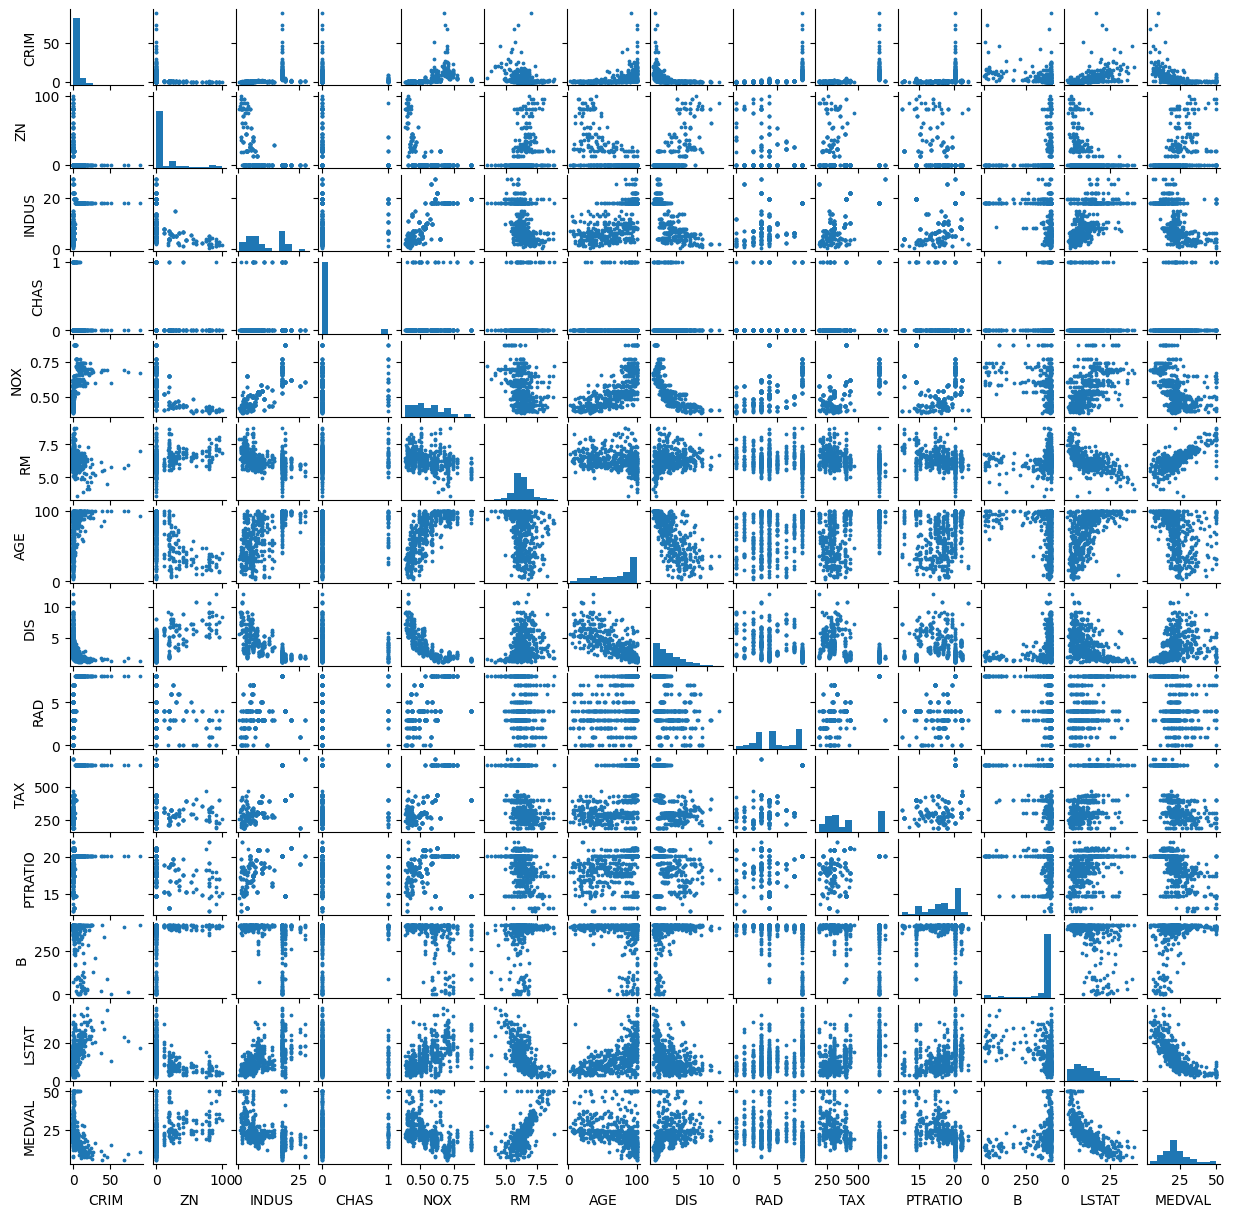

In [263]:
# Used Seaborn here in particular due tot he convenience of PairGrid
g = sns.PairGrid(df)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(plt.scatter, s=3)
g.fig.set_size_inches(12, 12)

###### (I) B vs. CRIM

Text(0, 0.5, 'CRIM')

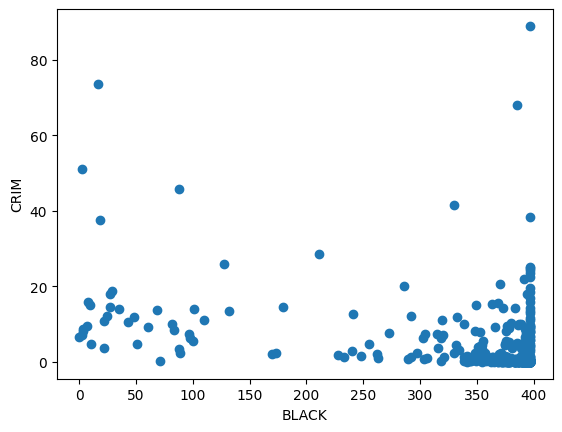

In [264]:
plt.scatter(df['B'], df['CRIM'])
plt.xlabel('BLACK')
plt.ylabel('CRIM')

There appears to be a no descernible relationship between B and CRIM.

###### (Ii) TAX vs. NOX

Text(0, 0.5, 'NOX')

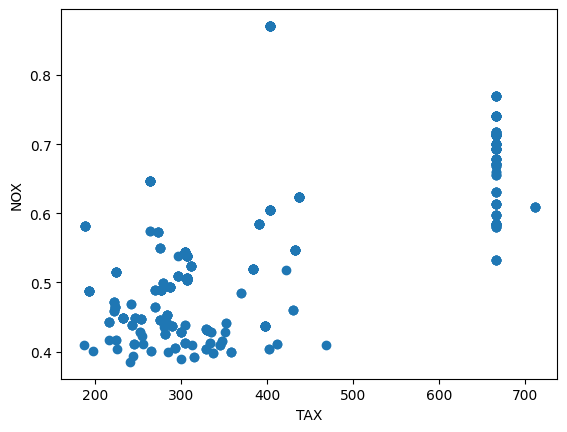

In [265]:
plt.scatter(df['TAX'], df['NOX'])
plt.xlabel('TAX')
plt.ylabel('NOX')

There appears to be a no descernible relationship between TAX and NOX.

###### (iIi) RM vs. MEDVAL

Text(0, 0.5, 'MEDVAL')

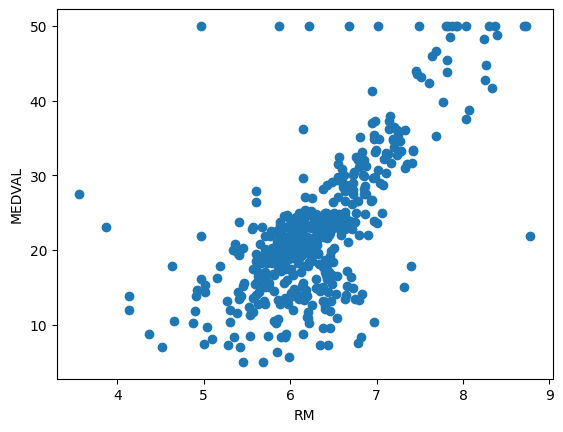

In [266]:
plt.scatter(df['RM'], df['MEDVAL'])
plt.xlabel('RM')
plt.ylabel('MEDVAL')

There appears to be a positive linear correlation between RM and the target variable. This is understandable since RM represents the number of rooms (more rooms generally indicate higher prices due to increased space).

###### (iv) LSTAT vs. MEDVAL

Text(0, 0.5, 'MEDVAL')

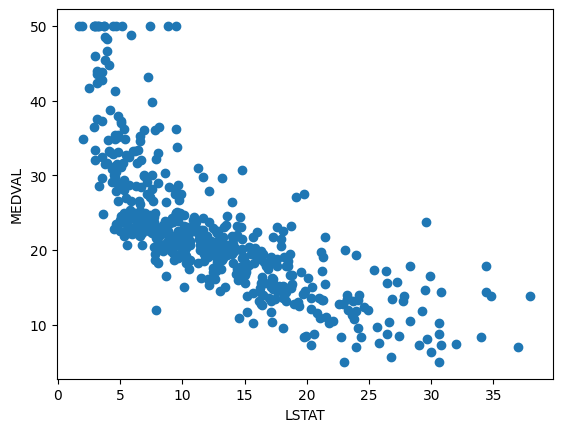

In [267]:
plt.scatter(df['LSTAT'], df['MEDVAL'])
plt.xlabel('LSTAT')
plt.ylabel('MEDVAL')

The relationship between LSTAT and the target variable seems to be negative and non-linear. This is not surprising, considering that LSTAT represents the percentage of lower status individuals in the area, and lower status is often associated with lower incomes and more affordable housing.

###### (v) RM vs. LSTAT

Text(0, 0.5, 'LSTAT')

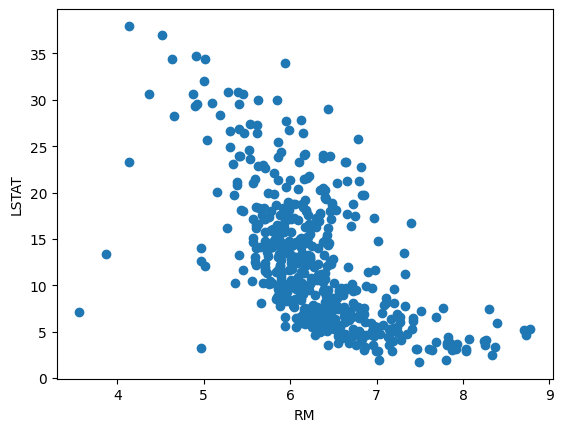

In [268]:
plt.scatter(df['RM'], df['LSTAT'])
plt.xlabel('RM')
plt.ylabel('LSTAT')

There appears to be a negative non-linear relationship between LSTAT and RM. This is logical since individuals with lower incomes (higher LSTAT) might have difficulty affording larger houses (higher RM).

##### (d) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

In [269]:
df.corrwith(df['CRIM']).sort_values(ascending=False)

CRIM       1.000000
TAX        0.582764
RAD        0.522855
LSTAT      0.455621
NOX        0.420972
INDUS      0.406583
AGE        0.352734
PTRATIO    0.289946
CHAS      -0.055892
ZN        -0.200469
RM        -0.219247
DIS       -0.379670
B         -0.385064
MEDVAL    -0.388305
dtype: float64

Based on the prior scatterplots and correlations, we will examine the three variables with the largest correlations: TAX, RAD, and LSTAT. These variables are most likely to have a significant impact on the target variable.

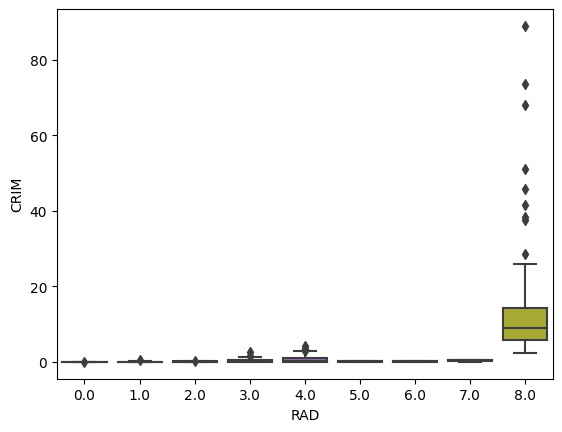

In [270]:
# Used box and whisker plot since RAD has few discrete values
ax = sns.boxplot(x="RAD", y="CRIM", data=df)

When the RAD variable reaches its highest value of 8, the range and average values of CRIM tend to be much higher, suggesting a strong association between higher values of RAD and increased crime rates.

Text(0, 0.5, 'CRIM')

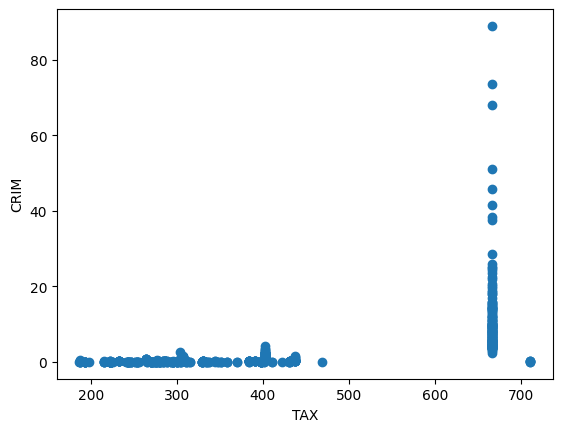

In [271]:
# Had to use basic scatter plot since TAX has continuous values
plt.scatter(df['TAX'], df['CRIM'])
plt.xlabel('TAX')
plt.ylabel('CRIM')

When the RAD variable reaches a value of 666, the range and average values of CRIM tend to be much higher, suggesting a strong association between higher values of TAX and increased crime rates.

Text(0, 0.5, 'CRIM')

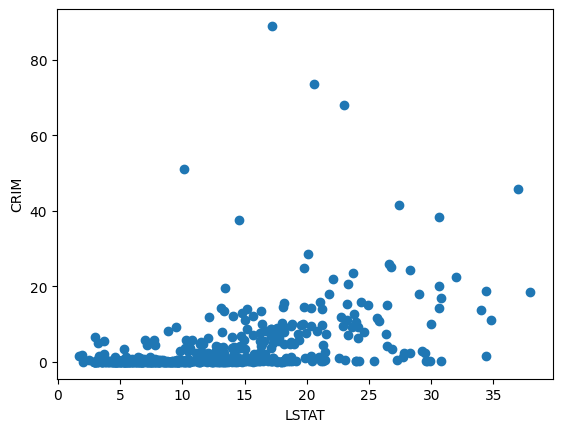

In [272]:
# Had to use basic scatter plot since LSTAT has continuous values
plt.scatter(df['LSTAT'], df['CRIM'])
plt.xlabel('LSTAT')
plt.ylabel('CRIM')

For LSTAT values below 10, the CRIM consistently remains under 10, implying that areas with a smaller proportion of lower status individuals generally exhibit lower crime rates. However, when LSTAT exceeds 10, the CRIM values show a wider range, suggesting that as the percentage of lower status individuals increases, the crime rates become more varied among different areas.

##### (e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

Taking top 3 suburbs for each predictor

In [273]:
df.loc[df['CRIM'].nlargest(3).index]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,8.0,666.0,20.2,396.90,17.21,10.4
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,8.0,666.0,20.2,16.45,20.62,8.8
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,8.0,666.0,20.2,384.97,22.98,5.0


In [274]:
df.loc[df['TAX'].nlargest(3).index]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,3.0,711.0,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,3.0,711.0,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,3.0,711.0,20.1,318.43,29.68,8.1


In [275]:
df.loc[df['PTRATIO'].nlargest(3).index]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,3.0,334.0,22.0,382.80,8.05,18.2
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,3.0,334.0,22.0,376.04,5.57,20.6
127,0.25915,0.0,21.89,0.0,0.624,5.693,96.0,1.7883,3.0,437.0,21.2,392.11,17.19,16.2


In [276]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,4.636364,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,2.443456,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,0.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,3.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,8.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The 3 towns shown in CRIM table are particularly high in CRIM as compared to other suburbs.
All the towns shown in the TAX table have the maximum TAX level across all suburbs.
PTRATIO table shows suburbs with near maximum pupil-teacher ratios.

##### (f) How many of the suburbs in this data set bound the Charles river?

In [277]:
df['CHAS'].value_counts()[1]

35

##### (g) What is the median pupil-teacher ratio among the towns in this data set?

In [278]:
df['PTRATIO'].median()

19.05

##### (h) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your fndings.

In [279]:
lowest_medval_sub = df['MEDVAL'].idxmin()
print("Suburb #: ", lowest_medval_sub)

Suburb #:  398


In [280]:
lowest_medval_sub_summary = df.describe()
lowest_medval_sub_summary.loc['range'] = lowest_medval_sub_summary.loc['max'] - lowest_medval_sub_summary.loc['min']
lowest_medval_sub_summary.loc[lowest_medval_sub] = df.loc[lowest_medval_sub]
lowest_medval_sub_summary

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,4.636364,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,2.443456,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,0.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,3.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,8.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000
range,88.969880,100.000000,27.280000,1.000000,0.486000,5.219000,97.100000,10.996900,8.000000,524.000000,9.400000,396.580000,36.240000,45.000000
398,38.351800,0.000000,18.100000,0.000000,0.693000,5.453000,100.000000,1.489600,8.000000,666.000000,20.200000,396.900000,30.590000,5.000000


The suburb with the lowest median value is 398. Relative to the other towns, this suburb has:
- high CRIM
- minimum ZN
- INDUS in 75th%
- does not bound the Charles river
- above 75th% NOX
- RM below 25th%
- maximum AGE
- near minimum DIS
- maximum RAD
- TAX in 75th%
- PTRATIO in 75th%
- B maximum
- LSTAT above 75th%

##### (i) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [281]:
print("# of suburbs with > 7 rooms per dwelling: ", len(df[df['RM']>7]))
print("# of suburbs with > 8 rooms per dwelling: ", len(df[df['RM']>8]))

# of suburbs with > 7 rooms per dwelling:  64
# of suburbs with > 8 rooms per dwelling:  13


In [282]:
df[df['RM']>8].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,5.307692,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,2.097006,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,1.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,4.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,6.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,7.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,8.000000,666.000000,20.200000,396.900000,7.440000,50.000000


In [283]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,4.636364,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,2.443456,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,0.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,3.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,8.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


As compared to overall suburbs, those with > 8 RM have:
- lower CRIM
- lower INDUS proportion
- lower LSTAT
- higher MEDVAL

### Chapter 3: \#15

#### 15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.





##### Setup

In [284]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

In [285]:
# loading Boston dataset
from sklearn.datasets import fetch_openml

boston_data = fetch_openml(name='boston', version=1, as_frame=False)
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

# target here is medval
df['MEDV'] = boston_data.target
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,1.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,1.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,2.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,2.0,222.0,18.7,396.90,5.33,36.2


##### (a) For each predictor, ft a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically signifcant association between the predictor and the response? Create some plots to back up your assertions.

In [286]:
print("{:>9} {:>22} {:>24}".format("predictor", "coef","pvalue"))
coefs = {}

predictors = [c for c in list(df) if c not in ["CRIM"]]
for predictor in predictors:
    model = 'CRIM ~ ' + predictor
    res = smf.ols(formula = model, data=df).fit()
    # http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html
    print("{:>9} {:>22} {:>24}".format(predictor, res.params[predictor],res.pvalues[predictor]))
    coefs[predictor] = [res.params[predictor]]

predictor                   coef                   pvalue
       ZN   -0.07393497740412348    5.506472107679059e-06
    INDUS     0.5097763311042313   1.4503489330272292e-21
     CHAS    -1.8927765508037608      0.20943450153520068
      NOX     31.248531201122923    3.751739260356816e-23
       RM     -2.684051224113948    6.346702984687886e-07
      AGE    0.10778622713953308   2.8548693502441573e-16
      DIS    -1.5509016824100994    8.519948766926204e-19
      RAD      1.840574669842609    7.580264101033951e-37
      TAX   0.029742252822765353    2.357126835257249e-47
  PTRATIO     1.1519827870705868   2.9429224473596663e-11
        B   -0.03627964056733074   2.4872739737737525e-19
    LSTAT     0.5488047820623981   2.6542772314732728e-27
     MEDV     -0.363159922257603   1.1739870821943694e-19


The list above indicates that every predictor except CHAS has a statistically significant association with CRIM at the 1% level. We now plot every predictor against the response with the regression line from the fit.

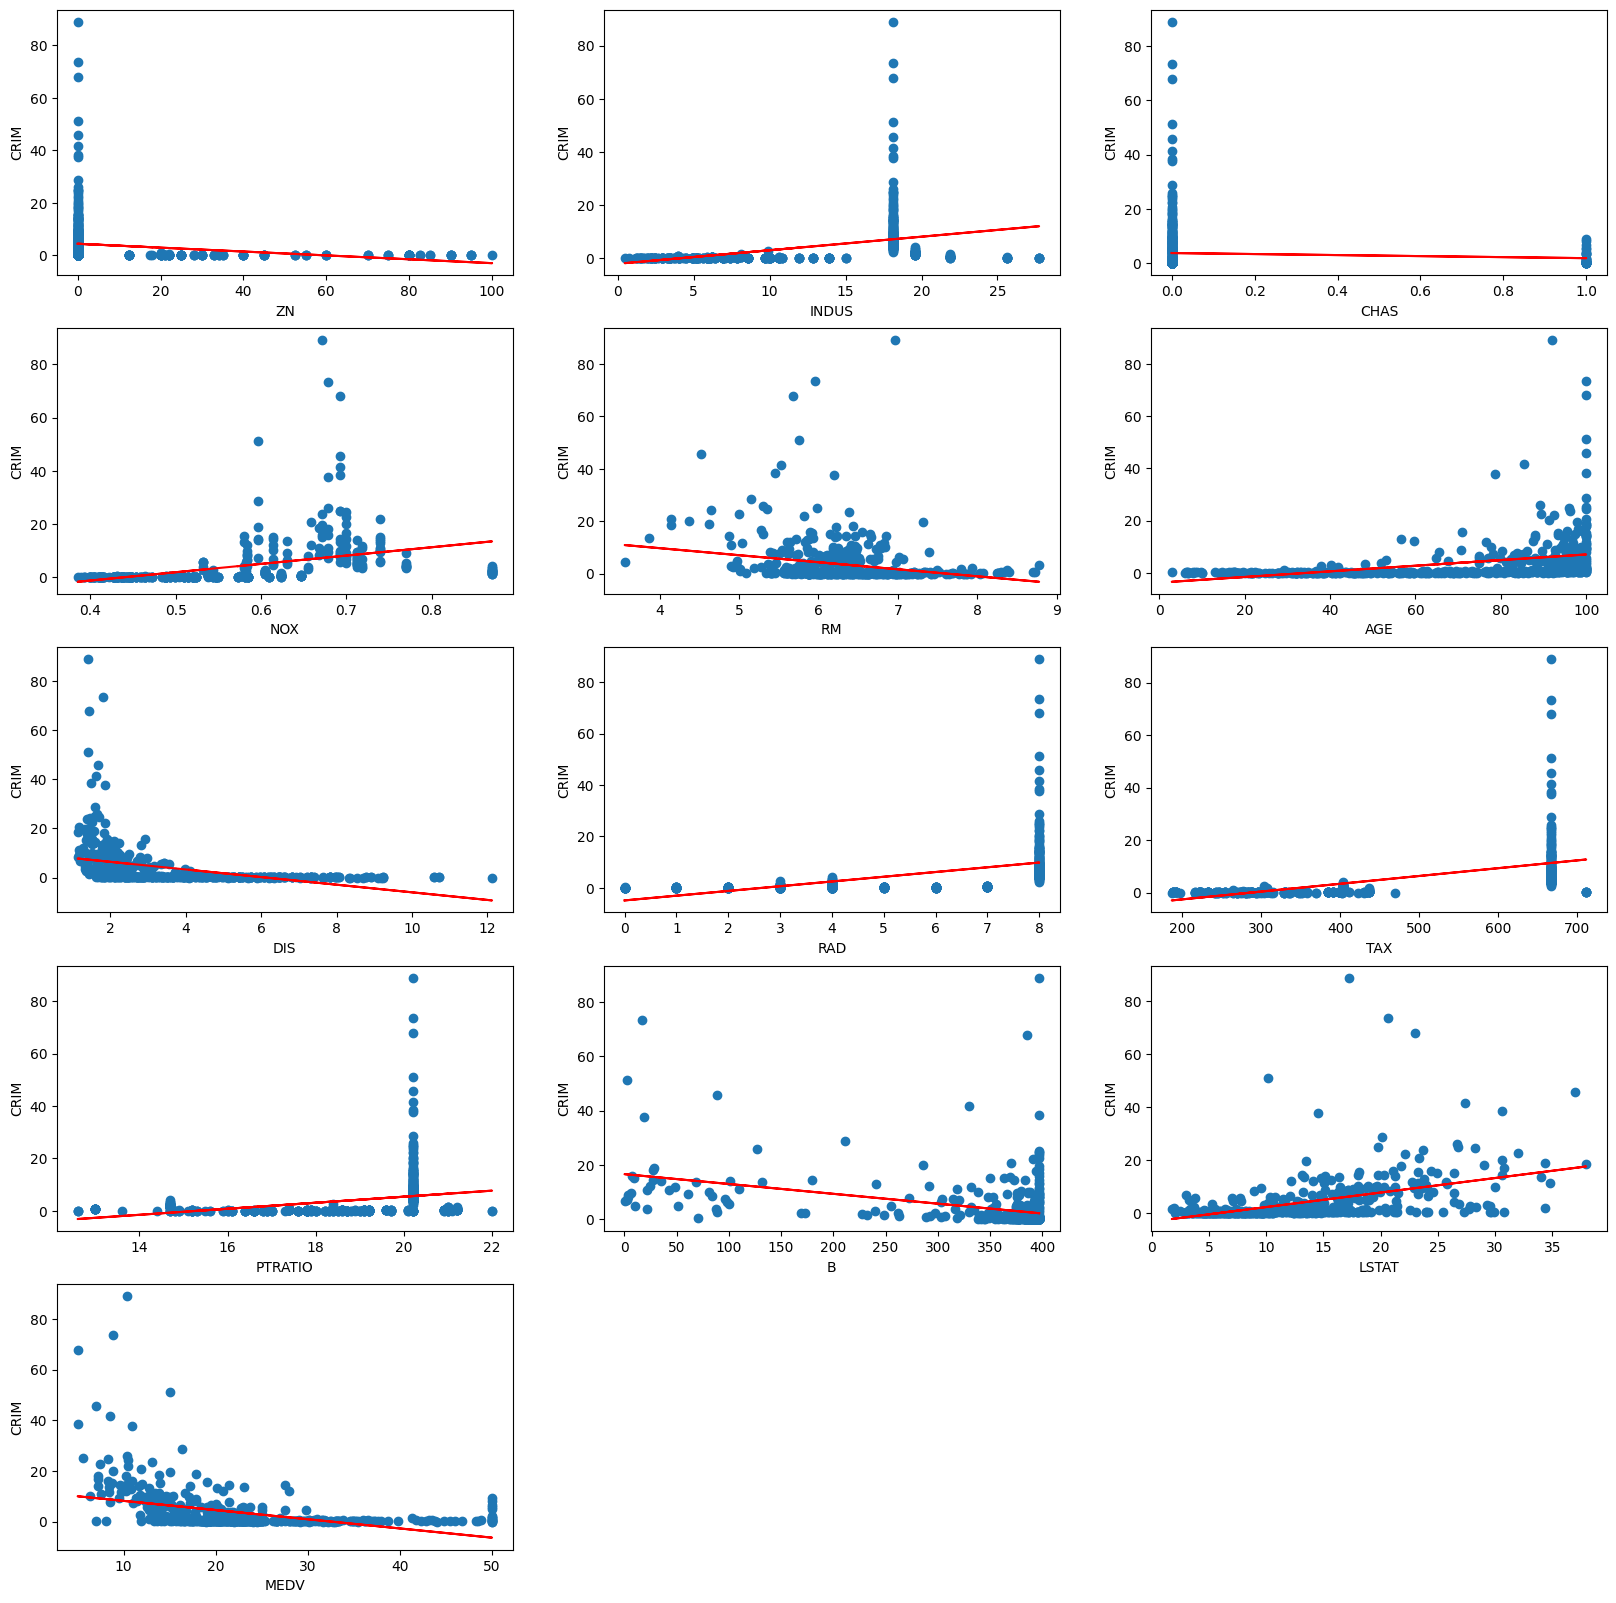

In [287]:
plt.figure(figsize=(20, 20))

for i, predictor in enumerate(predictors):
    model = 'CRIM ~ ' + predictor
    res = smf.ols(formula = model, data=df).fit()
    plt.subplot(5,3,i+1)
    plt.xlabel(predictor)
    plt.ylabel("CRIM")
    plt.scatter(df[predictor], df['CRIM'])
    plt.plot(df[predictor], res.fittedvalues, color='red')

##### (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [288]:
all_columns = "+".join([c for c in list(df) if c not in ["CRIM"]])
model = " CRIM ~ " + all_columns
res = smf.ols(formula = model, data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     26.93
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.69e-49
Time:                        15:33:47   Log-Likelihood:                -1670.4
No. Observations:                 506   AIC:                             3369.
Df Residuals:                     492   BIC:                             3428.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7520      7.169      0.663      0.5

Inspecting the t-statistics and p-values from the table above indicates that we can reject the null-hypothesis at the 1% level for every predictor except DIS and RAD.

##### (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefcients from (a) on the x-axis, and the multiple regression coefcients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefcient in a simple linear regression model is shown on the x-axis, and its coefcient estimate in the multiple linear regression model is shown on the y-axis.

In [289]:
for pred in coefs:
    coefs[pred].append(res.params[pred])

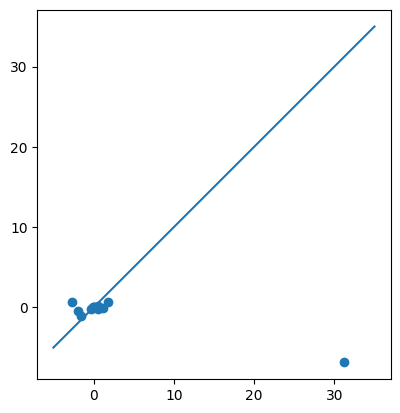

In [290]:
plt.scatter([coefs[pred][0] for pred in coefs], [coefs[pred][1] for pred in coefs])
plt.plot([-5,35],[-5,35]) # plot y=x
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

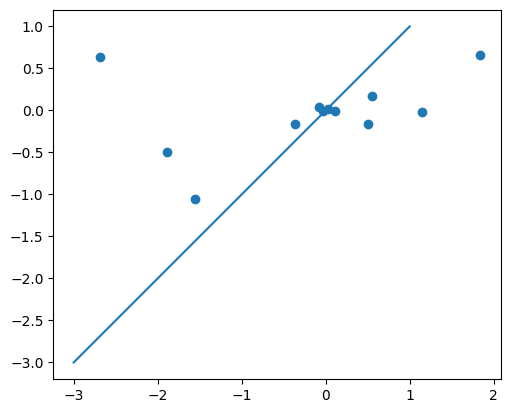

In [291]:
plt.scatter([coefs[pred][0] for pred in coefs if pred != "NOX"], [coefs[pred][1] for pred in coefs if pred != "NOX"])
plt.plot([-3,1], [-3,1]) # plot y=x
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [292]:
for pred in coefs:
    print("{:>9} {:>22} {:>24}".format(pred, coefs[pred][0], coefs[pred][1]))

       ZN   -0.07393497740412348      0.04594194278213773
    INDUS     0.5097763311042313      -0.1583088282114008
     CHAS    -1.8927765508037608      -0.4899224805567086
      NOX     31.248531201122923      -6.8568447076667685
       RM     -2.684051224113948        0.639040066606289
      AGE    0.10778622713953308    -0.006365031102130894
      DIS    -1.5509016824100994      -1.0480328423568717
      RAD      1.840574669842609       0.6630271534722262
      TAX   0.029742252822765353     0.015795818741076956
  PTRATIO     1.1519827870705868    -0.015014089869491607
        B   -0.03627964056733074    -0.010020380571961801
    LSTAT     0.5488047820623981       0.1769907722987928
     MEDV     -0.363159922257603      -0.1585819149972726


As can be seen from the two plots and table above there's a reasonable correlation between the coefficients of the individual and multiple regressions, except for a couple of outliers (namely, NOX, and perhaps PTRATIO if we try to "fit" the line y=x).

However, since we can only reject the null hypothesis for DIS and RAD, the other values are not very meaningful. We would also expect them to differ significantly between the individual and multiple regression case, since in the former the coefficient is the average change in the response from a unit change in the predictor completely ignoring the other predictors. In the latter case, the coefficient is the average change in the response from a unit change in the predictor while holding the other predictor fixed. Because of possible correlations, non-linearities and collinearities between the predictors, there is no expectancy that, in general, the coefficients in each case will be of the same magnitude or sign.

##### (d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, ft a model of the form Y = β0 + β1X + β2X2 + β3X3 + ".

predictor                   coef                   pvalue


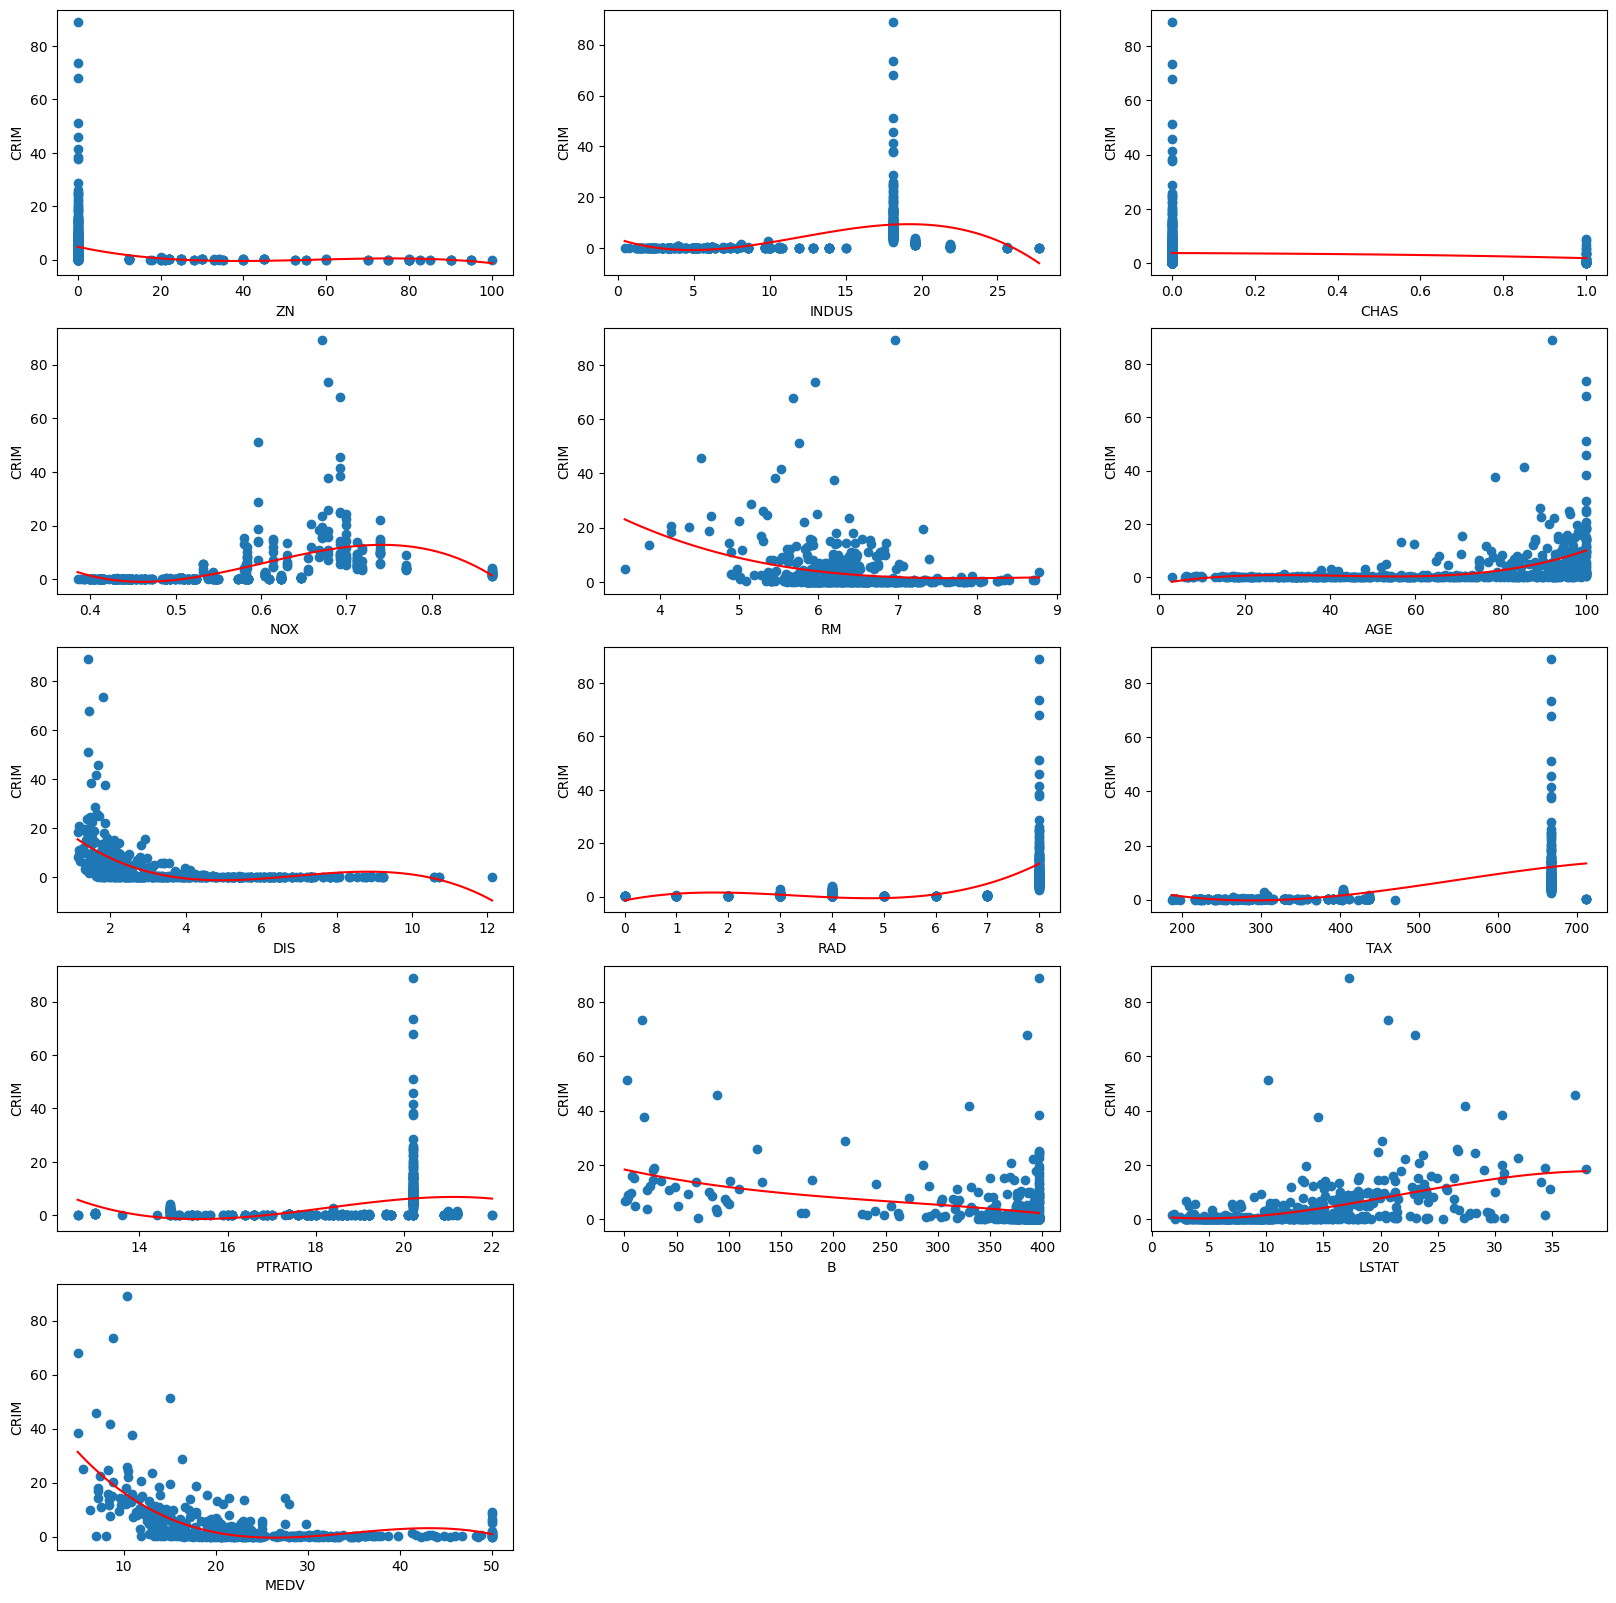

In [293]:
print("{:>9} {:>22} {:>24}".format("predictor", "coef","pvalue"))
coefs = {}

plt.figure(figsize=(20, 20))

for i, predictor in enumerate(predictors):
    model = 'CRIM ~ ' + predictor + " + np.power(" + predictor + ", 2) + np.power(" + predictor + ", 3)"
    res = smf.ols(formula = model, data=df).fit()
    plt.subplot(5,3,i+1)
    plt.xlabel(predictor)
    plt.ylabel("CRIM")
    plt.scatter(df[predictor], df['CRIM'])
    x = np.linspace(min(df[predictor]),max(df[predictor]), 100)
    y = res.params[0] + x*res.params[1]+ res.params[2]*(x**2)+ res.params[3]*(x**3)
    plt.plot(x, y, color='red')

In [294]:
print("{:>13} {:>22} {:>22} {:>22} {:>22} {:>22}".format("Pvalues for", "beta_0", "beta_1", "beta_2", "beta_3", "f_pvalue"))

for predictor in predictors:
    model = 'CRIM ~ ' + predictor + " + np.power(" + predictor + ", 2) + np.power(" + predictor + ", 3)"
    res = smf.ols(formula = model, data=df).fit()
    # http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html
    print("{:>13} {:>22} {:>22} {:>22} {:>22} {:>22}".format(predictor, res.pvalues[0], res.pvalues[1], res.pvalues[2], res.pvalues[3], res.f_pvalue))
    coefs[predictor] = [res.params[predictor]]

  Pvalues for                 beta_0                 beta_1                 beta_2                 beta_3               f_pvalue
           ZN  4.112999774012278e-26  0.0026122963084958843    0.09375049960210213    0.22953862049073218  1.281293258489926e-06
        INDUS   0.020365259712448427 5.2970636801341086e-05 3.4201868908979416e-10 1.1964046915293566e-12 1.5492707777353704e-32
         CHAS  1.239505484749389e-19    0.20943450153520113    0.20943450153520113    0.20943450153520116    0.20943450153521373
          NOX 1.3119388785383089e-11  2.758371552957301e-13  6.811299804638528e-15  6.961110034267934e-16 3.8066393195234877e-38
           RM     0.0814833504874318    0.21175641391747338    0.36410938528001324     0.5085751094048001  1.067392703223989e-07
          AGE     0.3577970771695893    0.14266082695248525   0.047377327525419156   0.006679915350919012 1.0210190681848272e-20
          DIS 1.6330882876939777e-30    6.3747923725066e-18  4.941214267724349e-12 1.088832028214

From the plots and table above, we can find evidence of a non-linear association, cubic type, between INDUS, NOX, AGE, DIS, PTRATIO and MEDV. In general, to get a sense if a non-linear association is present, we can plot the residuals of the linear fit against the fitted values and see if there is a non-linear trend.

### Chapter 6: \#9 and \#11

#### 9. In this exercise, we will predict the number of applications received using the other variables in the College data set.








##### Setup

In [295]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/College.csv')

In [296]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [298]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


##### (a) Split the data set into a training set and a test set.

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
# Removing the college name and the final target variable
X = df.iloc[:,3:]
X = X.iloc[:,:-1]

In [301]:
X.head()

,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend
0,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041
1,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527
2,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735
3,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016
4,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922


In [302]:
y = df['Apps']

In [303]:
y.head()

0    1660
1    2186
2    1428
3     417
4     193
Name: Apps, dtype: int64

In [304]:
X_train,  X_test,  y_train,  y_test  =  train_test_split(X, y, random_state=42)

##### (b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [305]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [306]:
lr = LinearRegression()

In [307]:
lr.fit(X_train, y_train)

LinearRegression()

In [308]:
predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Test Error (MSE):", mse)

Test Error (MSE): 1819407.8268842562


##### (c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

For a ridge and lasso regression, we normalize the predictors



In [309]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [310]:
ridge = Ridge()
scaler = StandardScaler()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # List of λ values to try
cv=5 # 5-fold cross-validation

In [311]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [312]:
grid_search = GridSearchCV(ridge, param_grid, cv=cv)

grid_search.fit(X_train, y_train)

best_lambda = grid_search.best_params_['alpha']
print("Best λ value:", best_lambda)

Best λ value: 100


In [313]:
ridge_model = Ridge(alpha=best_lambda)
ridge_model.fit(X_train, y_train)

Ridge(alpha=100)

In [314]:
predictions = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
non_zero_coeffs = np.sum(ridge_model.coef_ != 0)
print("Test Error (MSE):", mse)
print("Number of non-zero coefficient estimates:", non_zero_coeffs)

Test Error (MSE): 1820042.464935403
Number of non-zero coefficient estimates: 15


##### (d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefcient estimates.

In [315]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [316]:
lasso = Lasso()
scaler = StandardScaler()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # List of λ values to try
cv=5 # 5-fold cross-validation

In [317]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [318]:
grid_search = GridSearchCV(ridge, param_grid, cv=cv)

grid_search.fit(X_train, y_train)

best_lambda = grid_search.best_params_['alpha']
print("Best λ value:", best_lambda)

Best λ value: 100


In [319]:
lasso_model = Lasso(alpha=best_lambda)
lasso_model.fit(X_train, y_train)

Lasso(alpha=100)

In [320]:
predictions = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
non_zero_coeffs = np.sum(lasso_model.coef_ != 0)
print("Test Error (MSE):", mse)
print("Number of non-zero coefficient estimates:", non_zero_coeffs)

Test Error (MSE): 1835413.9658200138
Number of non-zero coefficient estimates: 13


##### (e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [321]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [322]:
# Step 3: Cross-validation to find optimal M
n_components = np.arange(1, min(X_train.shape[0], X_train.shape[1]) + 1)
pipe = Pipeline([
    ('pca', PCA()),
    ('regressor', LinearRegression())
])
param_grid = {
    'pca__n_components': n_components
}
grid_search = GridSearchCV(pipe, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)
best_M = grid_search.best_params_['pca__n_components']

In [323]:
# Step 4: Fit the PCR model
pca = PCA(n_components=best_M)
X_train_pca = pca.fit_transform(X_train)
pca_model = LinearRegression()
pca_model.fit(X_train_pca, y_train)

LinearRegression()

In [324]:
# Step 5: Evaluate the model on the test set
X_test_pca = pca.transform(X_test)
y_pred = pca_model.predict(X_test_pca)
test_error = mean_squared_error(y_test, y_pred)

print("Test error:", test_error)
print("Value of M selected by cross-validation:", best_M)

Test error: 1819407.8268842623
Value of M selected by cross-validation: 15


##### (f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [325]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [326]:
# Step 3: Cross-validation to find optimal M
n_components = np.arange(1, min(X_train.shape[0], X_train.shape[1]) + 1)
param_grid = {
    'n_components': n_components
}
pls = PLSRegression()
grid_search = GridSearchCV(pls, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)
best_M = grid_search.best_params_['n_components']

In [327]:
# Step 4: Fit the PLS model
pls_model = PLSRegression(n_components=best_M)
pls_model.fit(X_train, y_train)

PLSRegression(n_components=14)

In [328]:
# Step 5: Evaluate the model on the test set
y_pred = pls_model.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)

print("Test error:", test_error)
print("Value of M selected by cross-validation:", best_M)

Test error: 1819001.2495749663
Value of M selected by cross-validation: 14


##### (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much diference among the test errors resulting from these fve approaches?


The results obtained from the five approaches (Ridge regression, Lasso regression, Principal Component Regression (PCR), Partial Least Squares (PLS), and Ridge regression with cross-validation for λ selection) provide us with different models for predicting the number of college applications received.

The accuracy of the predictions and the test errors may vary among these approaches. To assess the accuracy of the predictions, we typically use the mean squared error (MSE) or other relevant metrics like R-squared (R²).

The lower the test error (MSE), the better the model's predictive performance. If the test error is low, it indicates that the model is able to generalize well to unseen data, which is crucial for making accurate predictions on new data.

The predictive accuracy and test errors can be influenced by several factors, including the size of the dataset, the number of features, the amount of noise in the data, the chosen regularization parameters (λ in Ridge and Lasso), and the number of latent components (M in PCR and PLS).

The best approach among the five depends on the specific dataset and problem at hand. Different approaches may work better for different types of data. It's essential to evaluate the models' performance on a separate test set (not used during training or hyperparameter tuning) to get a fair assessment of their predictive capabilities.

Comparing the test errors resulting from these five approaches can give you insights into their relative performance. If there is a significant difference in the test errors, it suggests that some models are better suited for the given data than others. In such cases, you would prefer the model with the lowest test error.

It's important to note that cross-validation is essential for hyperparameter tuning (e.g., selecting the best λ or M) to avoid overfitting. Cross-validation helps estimate the model's generalization performance and prevents overly optimistic results due to data snooping.

In summary, accurately predicting the number of college applications received depends on the specific dataset and the chosen approach. Comparing the test errors resulting from different methods can guide you in selecting the best model for this prediction task. The approach with the lowest test error should be preferred as it indicates better predictive performance on unseen data.

#### 11. We will now try to predict per capita crime rate in the Boston data set.

##### Setup

In [329]:
# loading Boston dataset
from sklearn.datasets import fetch_openml

boston_data = fetch_openml(name='boston', version=1, as_frame=False)
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

# target here is medval
df['MEDV'] = boston_data.target
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,1.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,1.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,2.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,2.0,222.0,18.7,396.90,5.33,36.2


##### (a) Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

##### (b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, crossvalidation, or some other reasonable alternative, as opposed to using training error.

##### (c) Does your chosen model involve all of the features in the data set? Why or why not?

### Chapter 8: \#8 and \#11

#### 8. In the lab, a classifcation tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable

##### Setup

In [330]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn import preprocessing

In [331]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Carseats.csv')

In [332]:
df.head()

,SlNo,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SlNo         400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    object 
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    object 
 11  US           400 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [334]:
df.describe()

,SlNo,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,115.614301,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,1.000000,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,100.750000,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,200.500000,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,300.250000,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,400.000000,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [335]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cols_to_embed = ['ShelveLoc', 'Urban', 'US']

# Label Encoding
for column in cols_to_embed[0:]:
    df[column] = label_encoder.fit_transform(df[column])

In [336]:
df.head()

,SlNo,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,0,42,17,1,1
1,2,11.22,111,48,16,260,83,1,65,10,1,1
2,3,10.06,113,35,10,269,80,2,59,12,1,1
3,4,7.40,117,100,4,466,97,2,55,14,1,1
4,5,4.15,141,64,3,340,128,0,38,13,1,0


##### (a) Split the data set into a training set and a test set.

In [337]:
X = df.iloc[:, 2:]

In [338]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [339]:
y = df['Sales']

In [340]:
y.head()

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

In [341]:
X_train,  X_test,  y_train,  y_test  =  train_test_split(X, y, random_state=42)

##### (b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [342]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dtr_model = DecisionTreeRegressor(random_state = 42)

In [343]:
# Train the model
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [344]:
# Predict the target variable for both the training and testing data
y_test_pred = dtr_model.predict(X_test)

In [345]:
# Calculate the Mean Squared Error (MSE) on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", test_mse)

Test MSE: 5.479069000000001


##### (c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

In [346]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [347]:
# Build a regressor
rgr = DecisionTreeRegressor(random_state=1)

In [348]:
# Grid of parameters to hypertune
param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [349]:
# Run grid search
grid_search = GridSearchCV(rgr,
                           param_grid=param_grid,
                           cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [350]:
# Find the best estimator
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=5, random_state=1)

##### (d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important.

In [351]:
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [352]:
# Create a base DecisionTreeRegressor (you can customize hyperparameters if needed)
base_model = DecisionTreeRegressor()

In [353]:
# Create a BaggingRegressor with the base model
bagging_regressor = BaggingRegressor(base_model, n_estimators=100, random_state=42)

In [354]:
# Fit the bagging ensemble to the training data
bagging_regressor.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=42)

In [355]:
# Make predictions on the test set
y_pred = bagging_regressor.predict(X_test)

In [356]:
# Calculate the test MSE
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

Test MSE: 3.0216031655999984


In [357]:
# Get the feature importances from the ensemble
# feature_importances = bagging_regressor.feature_importances_

# # Print the importance of each feature
# for i, importance in enumerate(feature_importances):
#     print(f"Feature {i+1}: Importance = {importance}")

feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging_regressor.estimators_
], axis=0)
feature_importances

array([0.10261252, 0.05191635, 0.09385295, 0.04943916, 0.31488632,
       0.21801618, 0.12022531, 0.03326573, 0.00812356, 0.00766193])

##### (e) Use random forests to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important. Describe the efect of m, the number of variables considered at each split, on the error rate obtained.

In [358]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [359]:
# Create a RandomForestRegressor with the desired number of trees (n_estimators)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

In [360]:
# Fit the Random Forest to the training data
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [361]:
# Make predictions on the test set
y_pred = random_forest.predict(X_test)

In [362]:
# Calculate the test MSE
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

Test MSE: 2.976131277799999


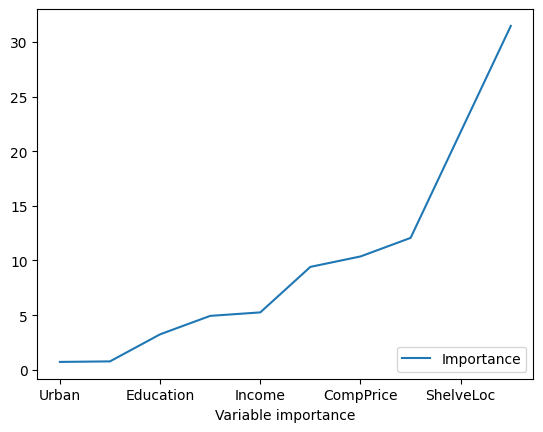

In [363]:
# Variable importance
importance = pd.DataFrame({'Importance':random_forest.feature_importances_*100}, index=X_train.columns)
importance.sort_values('Importance', axis=0, ascending=True).plot()
plt.xlabel('Variable importance')
plt.legend(loc='lower right')

The test MSE decreased when compared with the previous answers. One possible explanation for this result is the effect of m. In random forests, the number of variables considered at each split changes. This means that, at each split, only a subset of predictors is taken into account. In some sense, this works as a process to decorrelate the decision trees. For example, in baggin, if there is a strong predictor in the data set, most of the bagged trees wil use this predictor in the top split. As a consequence, the predictions from the bagged trees will tend to be highly correlated. In random forests, this doesn't happen because the method forces each split to consider only a subset of the predictors. Hence, the method leads to models with reducted variance and increased reliability. That's a possible reason for the reduction verified in the test MSE value.

Now, let's discuss the effect of m, the number of variables considered at each split, on the error rate obtained. In Random Forests, each tree is built by considering a random subset of features at each split point. This randomization helps the ensemble to be less correlated and more diverse, contributing to improved generalization.

The parameter m is often referred to as max_features in scikit-learn's Random Forest implementation. The default value for max_features is "auto," which means max_features=sqrt(n_features) for regression problems, where n_features is the total number of features in the dataset.

The effect of m on the error rate can be summarized as follows:

Smaller m: If you decrease max_features, each tree becomes more constrained and less likely to overfit to noise in the data. This can lead to reduced variance but potentially increased bias. It may be beneficial when dealing with high-dimensional datasets or when you suspect that some features are noisy or irrelevant.

Larger m: If you increase max_features, each tree becomes less constrained and has a higher chance of overfitting to the training data. This can lead to reduced bias but potentially increased variance. It may be beneficial when dealing with low-dimensional datasets or when you want to capture complex relationships between features.

Choosing the right value for max_features is a trade-off between reducing overfitting and capturing important patterns in the data. In practice, you can try different values for max_features and use techniques like cross-validation to find the optimal value that yields the best trade-off between bias and variance, ultimately leading to better generalization performance on unseen data.

##### (f) Now analyze the data using BART, and report your results.

#### 11. This question uses the Caravan data set.




##### Setup

In [364]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn import preprocessing

In [365]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Caravan.csv', index_col="Unnamed: 0")

In [366]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 1 to 5822
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOSTYPE   5822 non-null   int64 
 1   MAANTHUI  5822 non-null   int64 
 2   MGEMOMV   5822 non-null   int64 
 3   MGEMLEEF  5822 non-null   int64 
 4   MOSHOOFD  5822 non-null   int64 
 5   MGODRK    5822 non-null   int64 
 6   MGODPR    5822 non-null   int64 
 7   MGODOV    5822 non-null   int64 
 8   MGODGE    5822 non-null   int64 
 9   MRELGE    5822 non-null   int64 
 10  MRELSA    5822 non-null   int64 
 11  MRELOV    5822 non-null   int64 
 12  MFALLEEN  5822 non-null   int64 
 13  MFGEKIND  5822 non-null   int64 
 14  MFWEKIND  5822 non-null   int64 
 15  MOPLHOOG  5822 non-null   int64 
 16  MOPLMIDD  5822 non-null   int64 
 17  MOPLLAAG  5822 non-null   int64 
 18  MBERHOOG  5822 non-null   int64 
 19  MBERZELF  5822 non-null   int64 
 20  MBERBOER  5822 non-null   int64 
 21  MBERMIDD  5822

In [368]:
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [369]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cols_to_embed = ['Purchase']

# Label Encoding
for column in cols_to_embed[0:]:
    df[column] = label_encoder.fit_transform(df[column])

In [370]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


##### (a) Create a training set consisting of the frst 1,000 observations, and a test set consisting of the remaining observations.

In [371]:
X = df.drop(columns='Purchase')
y = df.Purchase

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.82823771899, random_state=42)

In [372]:
len(X_train), len(y_train)

(1000, 1000)

##### (b) Fit a boosting model to the training set with Purchase as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

In [373]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report

boost = GradientBoostingRegressor(n_estimators=1000, max_depth=6, learning_rate=0.01).fit(X_train, y_train)

In [374]:
feature_importance = boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index = X.columns).sort_values(ascending=False, inplace = False)
rel_imp

PPERSAUT    6.790668
MFGEKIND    5.162770
MOSTYPE     4.187400
MBERARBO    3.288759
MINK3045    3.202018
              ...   
PZEILPL     0.000000
APERSONG    0.000000
PPERSONG    0.000000
AZEILPL     0.000000
PVRAAUT     0.000000
Length: 85, dtype: float64

In [375]:
print("Mean Squared Error: ", mean_squared_error(y_test, boost.predict(X_test)))

Mean Squared Error:  0.06728562491140075


##### (c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [376]:
boost_pred = pd.DataFrame(boost.predict(X_test))
boost_pred.columns = ['Predictions']
boost_pred.head()

,Predictions
0,0.024163
1,-0.000075
2,0.017009
3,-0.010450
4,0.056017


In [377]:
boost_prob = np.where(boost_pred.Predictions>0.2, 1, 0)
boost_prob

array([0, 0, 0, ..., 0, 0, 0])

In [378]:
class_mat = pd.DataFrame(confusion_matrix(y_test, boost_prob).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
class_mat

,No,Yes
No,4058,220
Yes,476,68


In [379]:
print(classification_report(y_test, boost_prob))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      4534
           1       0.12      0.24      0.16       288

    accuracy                           0.86      4822
   macro avg       0.54      0.57      0.54      4822
weighted avg       0.90      0.86      0.88      4822



Therefore, it correctly predicts for 86% of the test data set.

In [380]:
from sklearn.linear_model import LinearRegression

In [381]:
lmreg = LinearRegression().fit(X_train, y_train)
lmpred = pd.DataFrame(lmreg.predict(X_test))
lmpred.columns = ['Predictions']

In [382]:
lmpred.Predictions = np.where(lmpred.Predictions>0.2, 1, 0)
class_mat = pd.DataFrame(confusion_matrix(y_test, lmpred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
class_mat

,No,Yes
No,4290,238
Yes,244,50


In [383]:
print(classification_report(y_test, lmpred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4534
           1       0.17      0.17      0.17       288

    accuracy                           0.90      4822
   macro avg       0.56      0.56      0.56      4822
weighted avg       0.90      0.90      0.90      4822



Linear regression provides better results to those of boosting.

In [384]:
from sklearn.linear_model import LogisticRegression

In [385]:
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
logpred = pd.DataFrame(logreg.predict(X_test))
logpred.columns = ['Predictions']

In [386]:
logpred.Predictions = np.where(logpred.Predictions>0.2, 1, 0)
class_mat = pd.DataFrame(confusion_matrix(y_test, logpred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
class_mat

,No,Yes
No,4494,276
Yes,40,12


In [387]:
print(classification_report(y_test, logpred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4534
           1       0.23      0.04      0.07       288

    accuracy                           0.93      4822
   macro avg       0.59      0.52      0.52      4822
weighted avg       0.90      0.93      0.91      4822



Logistic regression provides even better predictions than linear regression and boosting.

### Chapter 10: \#7

#### 7. Fit a neural network to the Default data.

##### Setup

In [388]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn import preprocessing

In [389]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Default.csv', index_col="Unnamed: 0")

In [390]:
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [392]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [393]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cols_to_embed = ['default', 'student']

# Label Encoding
for column in cols_to_embed[0:]:
    df[column] = label_encoder.fit_transform(df[column])

In [394]:
df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


##### (a) Use a single hidden layer with 10 units, and dropout regularization.

In [395]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [396]:
# Assuming the 'Default' column is the target variable, and the rest are features
X = df.drop(columns=['default'])
y = df['default']

In [397]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [398]:
# Standardize the features for better neural network performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [399]:
# Create the neural network model with a single hidden layer containing 10 units and dropout regularization
model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', alpha=0.01, random_state=42)

In [400]:
# Train the model
model.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(10,), random_state=42)

In [401]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [402]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9700


##### (b) Compare the classifcation performance of your model with that of linear logistic regression.

In [403]:
from sklearn.linear_model import LogisticRegression

In [404]:
# Create and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)

In [405]:
# Train the logistic regression model
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [406]:
# Predict on the test set using the logistic regression model
y_pred_logreg = logreg_model.predict(X_test_scaled)

In [407]:
# Calculate accuracy on the test set using the logistic regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

Logistic Regression Accuracy: 0.9700


## Other Problems

### Problem 1: Beauty Pays!
Professor Daniel Hamermesh from UT’s economics department has been studying the im-
pact of beauty in labor income (yes, this is serious research!!).
First, watch the following video:
http://thedailyshow.cc.com/videos/37su2t/ugly-people-prejudice
It turns out this is indeed serious research and Dr. Hamermesh has demonstrated the effect
of beauty into income in a variety of different situations. Here’s an example: in the paper
“Beauty in the Classroom”
they showed that
“...instructors who are viewed as better looking
receive higher instructional ratings”
leading to a direct impact in the salaries in the long
run.
By now, you should know that this is a hard effect to measure. Not only one has to work
hard to figure out a way to measure “beauty” objectively (well, the video said it all!) but
one also needs to
“adjust for many other determinants”
(gender, lower division class, native
language, tenure track status).
So, Dr. Hamermesh was kind enough to share the data for this paper with us. It is available
in our class website in the file
“BeautyData.csv”
. In the file you will find, for a number
of UT classes, course ratings, a relative measure of beauty for the instructors, and other
potentially relevant variables.
1.
Using the data, estimate the effect of “beauty” into course ratings. Make sure to
think about the potential many
“other determinants”
. Describe your analysis and
your conclusions.
2.
In his paper, Dr. Hamermesh has the following sentence:
“Disentangling whether
this outcome represents productivity or discrimination is, as with the issue generally,
probably impossible”
. Using the concepts we have talked about so far, what does he
mean by that?

### Problem 2: Housing Price Structure
Thefile
MidCity.xls
, available on the class website, contains data on 128 recent sales of
houses in a town. For each sale, the file shows the neighborhood in which the house is
located, the number of offers made on the house, the square footage, whether the house
is made out of brick, the number of bathrooms, the number of bedrooms, and the selling
price. Neighborhoods 1 and 2 are more traditional whereas 3 is a more modern, newer and
more prestigious part of town. Use regression models to estimate the pricing structure of
houses in this town and answer the following questions:
1.
Is there a premium for brick houses everything else being equal?
2.
Is there a premium for houses in neighborhood 3?
3.
Is there an extra premium for brick houses in neighborhood 3?
4.
For the purposes of prediction could you combine the neighborhoods 1 and 2 into a
single “older” neighborhood?

### Problem 3: What causes what??
Listen to this podcast:
http://www.npr.org/blogs/money/2013/04/23/178635250/episode-453-what-causes-what
1.
Why can’t I just get data from a few different cities and run the regression of “Crime”
on “Police” to understand how more cops in the streets affect crime? (“Crime” refers
to some measure of crime rate and “Police” measures the number of cops in a city)
2.
How were the researchers from UPENN able to isolate this effect? Briefly describe
their approach and discuss their result in the “Table 2” below.
3.
Why did they have to control for METRO ridership? What was that trying to capture?
4.
In the next page, I am showing you “Table 4” from the research paper. Just focus
on the first column of the table. Can you describe the model being estimated here?
What is the conclusion?

### Problem 5: Final Project
Describe your contribution to the final group project (1/2 page max).